In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

# Training

In [2]:
train = pd.read_csv("../data/processed/train.csv")
train.head(3)

,Unnamed: 0,E_91,E_53,E_159,E_129,E_154,E_155,E_210,E_140,E_51,...,E_121,E_120,E_142,E_195,E_183,E_224,E_223,E_5,SEX,PATHOLOGY
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,URTI
1,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,HIV (initial infection)
2,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia


In [3]:
X = train.drop(['Unnamed: 0', 'PATHOLOGY'], axis=1)
y = train['PATHOLOGY']

In [4]:
clf = LogisticRegression(random_state=0, max_iter=10000000)
clf.fit(X, y)

# 3 minutes

LogisticRegression(max_iter=10000000, random_state=0)

In [9]:
from joblib import dump
dump(clf, "../models/baseline.joblib") 

['../models/baseline.joblib']

# Testing

In [10]:
test = pd.read_csv("../data/processed/test.csv")
test.head(3)

,Unnamed: 0,E_91,E_53,E_159,E_129,E_154,E_155,E_210,E_140,E_51,...,E_121,E_120,E_142,E_195,E_183,E_224,E_223,E_5,SEX,PATHOLOGY
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,GERD
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Bronchitis
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Acute dystonic reactions


In [11]:
X_test = test.drop(['Unnamed: 0', 'PATHOLOGY'], axis=1)
y_test = test['PATHOLOGY']

In [12]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

# 99%, wow...

0.9930646923711616

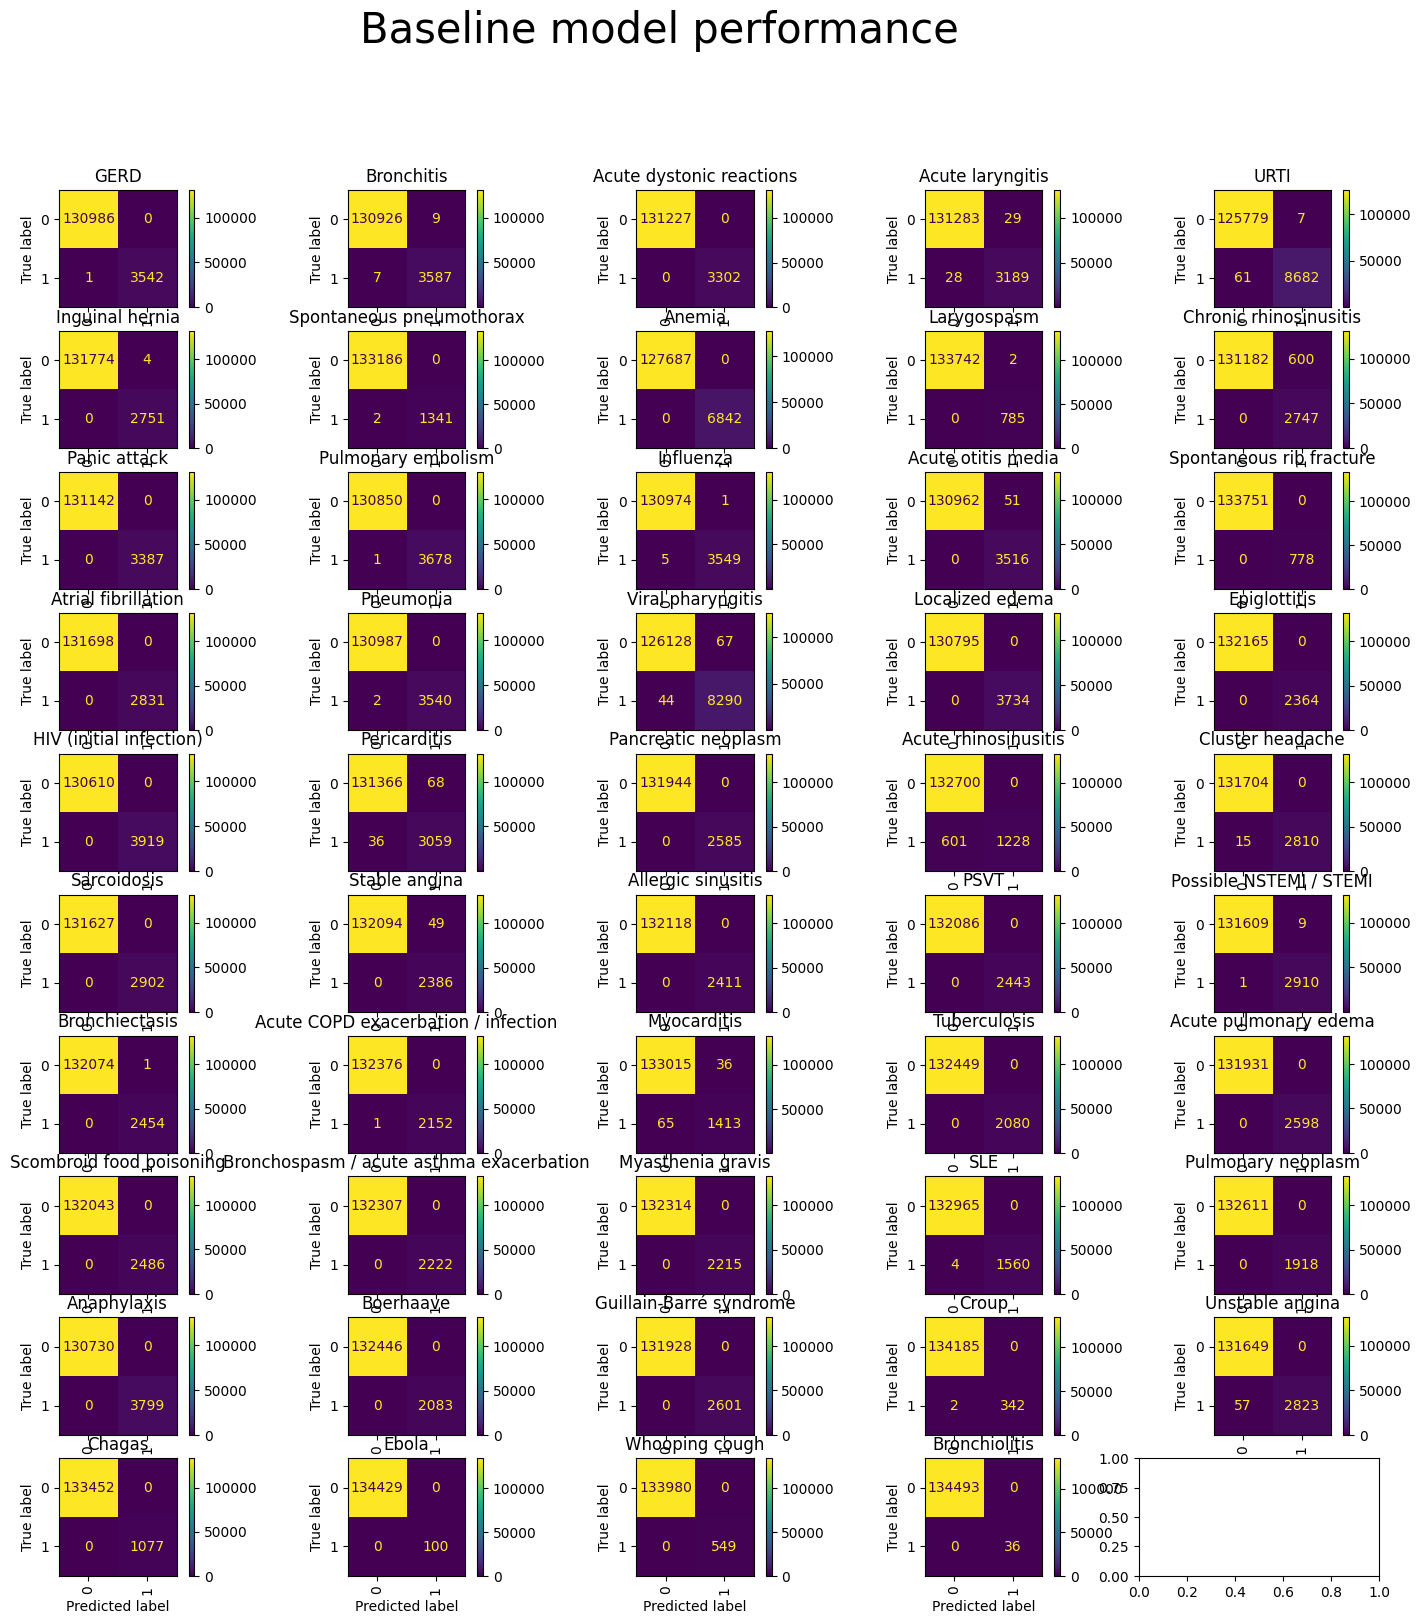

In [61]:
test_labels=y_test.unique()

confusion_matrices = multilabel_confusion_matrix(y_test, pred, labels=test_labels)
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(18, 18))
fig.suptitle("Baseline model performance", fontsize=30)
i = 0
for conf_matrix, ax in zip(confusion_matrices, axs.ravel()):
    disp = ConfusionMatrixDisplay(conf_matrix)
    disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", ax=ax)
    ax.set_title(test_labels[i])
    i+=1
plt.show()

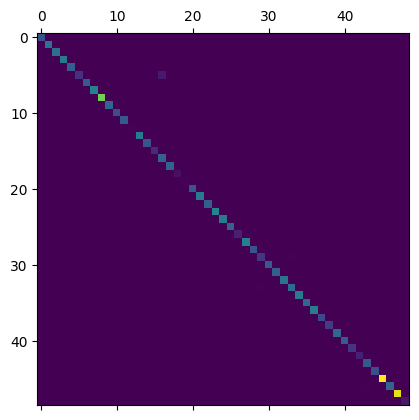

In [66]:
conf_matrix = confusion_matrix(y_test, pred)
plt.matshow(conf_matrix);

In [74]:
conf_matrix_df = pd.DataFrame(conf_matrix, columns=test_labels, index=test_labels)

Text(0.5, 1.0, 'Baseline model confusion matrix')

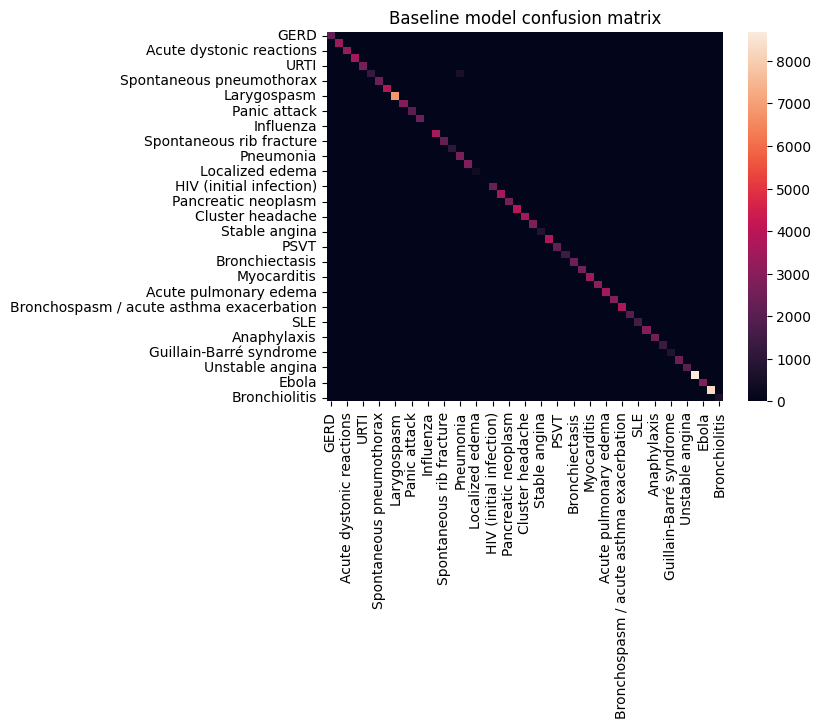

In [75]:
sns.heatmap(conf_matrix_df)
plt.title("Baseline model confusion matrix")